# Pandas - joining tables and relationships between multiple variables
This lesson is about putting data from various sources together and examining relationships between variables

We will learn:
- the essentials of joining tables based on simplified examples
- how to effectively join tables from real-world datasets
- what is Correlation between variables (and what p-value means)
- how to visualise relationships between different variables with seaborn

In [1]:
# Imports as usual 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import IPython

%matplotlib inline

## Joining tables - select a function:


`pandas` offers four functions / methods:

- [`pd.concat([df1, df2])`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
    - stacking vertically and horizontally
    - simple inner/outer joins on indexes
    
    
    
- ([`df1.append(df2)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) -stacking tables vertically) - **DEPRECATED!**

- [`pd.merge([df1,df2])`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) is a universal function for joining tables based on a link between indexes or columns.
- [`df1.join(df2)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) joining two tables inner/outer/left/right joins on Indexes

For a detailed overview of what you can do, see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

### Concatenating - Stack rows or columns

Stack `Series` or `data frame` with the same column names 

#### Concatenate Series vertically (rows)

In [2]:
a = pd.Series (["one", "two", "three"])
b = pd.Series (["four", "five", "six"])

In [3]:
pd.concat([a,b])

0      one
1      two
2    three
0     four
1     five
2      six
dtype: object

#### Concatenate dataframe vertically (rows)

In [4]:
df1 = pd.DataFrame({ "first_name": ["Magda", "Anna"],
                    "last_name": ["Cos", "Schwarzer"]})
df1

,first_name,last_name
0,Magda,Cos
1,Anna,Schwarzer


In [5]:
df2 = pd.DataFrame({"first_name": ["Mike", "Rob"],
                    "lastname": ["Planck", "Grey"]})
df2

,first_name,lastname
0,Mike,Planck
1,Rob,Grey


In [6]:
pd.concat([df1,df2])

,first_name,last_name,lastname
0,Magda,Cos,NaN
1,Anna,Schwarzer,NaN
0,Mike,NaN,Planck
1,Rob,NaN,Grey


> 💡 Have you noticed that the index repeats? We created two `Series` for which we did not specify the index. `pandas` did specify it and after concatening we are left with duplicate values.

Simply use the additional argument `ignore_index = True` and index will be created from scrach after concatenating the tables.

In [7]:
pd.concat([df1,df2], ignore_index=True)

,first_name,last_name,lastname
0,Magda,Cos,NaN
1,Anna,Schwarzer,NaN
2,Mike,NaN,Planck
3,Rob,NaN,Grey


#### Concatenate Series horizontally (columns)
If we want to concatenate "to the right" (couple of `Series`), just add the well-known `axis` argument:

In [8]:
pd.concat([a, a, a, a, a], axis="columns")

,0,1,2,3,4
0,one,one,one,one,one
1,two,two,two,two,two
2,three,three,three,three,three


### Simplest JOIN

In [9]:
movie_example = pd.DataFrame({"movie_id" : [1,2,3,4], "title" : ["Miss Jerry", "Black Panther", "Titanic", "The Wind"]})
movie_example

,movie_id,title
0,1,Miss Jerry
1,2,Black Panther
2,3,Titanic
3,4,The Wind


In [10]:
ratings_example = pd.DataFrame({"movie_id" : [1,1,1,2,3,4], "rating" : [1.5, 3.5, 7, 8, 10, 6], "username": ["joe", "marie667", "kevin_", "kevin_", "noot.me", "joe"]})
ratings_example

,movie_id,rating,username
0,1,1.5,joe
1,1,3.5,marie667
2,1,7.0,kevin_
3,2,8.0,kevin_
4,3,10.0,noot.me
5,4,6.0,joe


Let's imagine that you want to examine the ratings `data frame` and instead of `movie_id` you would also like to know the `title` of each movie that got the rating

The best way to accomplish this task is to "join" (or "merge") the `data frames` by using the Pandas `merge` function

In [11]:
movie_example.columns

Index(['movie_id', 'title'], dtype='object')

In [12]:
ratings_example.columns

Index(['movie_id', 'rating', 'username'], dtype='object')

In [13]:
movie_ratings_example = pd.merge(movie_example, ratings_example)
movie_ratings_example.columns

Index(['movie_id', 'title', 'rating', 'username'], dtype='object')

In [14]:
movie_ratings_example.head()

,movie_id,title,rating,username
0,1,Miss Jerry,1.5,joe
1,1,Miss Jerry,3.5,marie667
2,1,Miss Jerry,7.0,kevin_
3,2,Black Panther,8.0,kevin_
4,3,Titanic,10.0,noot.me


In [15]:
movie_ratings_example.shape

(6, 4)

#### Key take-aways:

- `pandas`automatically detected common column - `movie_id`. Movie_id becomes a `key`on which data frames will be joined.

- `pandas`goes through each row, starting from the one with movie_id = 1, then it searches for matching counterparts in ratings table - every time it finds a match it records the data (`rating` and `username`) from the `ratings` table. We have 3 matches with movie_id =1 which translates to 3 new rows.

At the end of the iteration `pandas`creates a new dataframe with 2 columns from movie_example (`movie_id`, `title` ) and  and 2 columns from rating_example: `rating` and `username`

### 4 types of JOINS

`pandas`supports 4 types of joins:

- `inner`: intersection of keys from both data frames and preserves the order of the left key in the left dataframe
- `outer`: union of keys from both data frames
- `left`: use only keys from left data frame,(all keys from left data frame and only matching ones from right)
- `right`: use only keys from right frame (all keys from left data frame and only matching ones from right)

`inner join`is default - used to create movie_ratings data frame.

It can be advisable at the beginning to use `left join` instead of `right_join` and always place the dataframe for which we want to preserve all rows as first argument in `merge`function.

In [16]:
fruits_price = pd.DataFrame({'fruit': ['orange', 'apple', 'pear'], 'price':[1, 2, 3]})
fruits_price

,fruit,price
0,orange,1
1,apple,2
2,pear,3


In [17]:
fruits_weight = pd.DataFrame({'fruit': ['orange', 'apple', 'banana'], 'weight':[0.3, 0.1, 0.2]})
fruits_weight

,fruit,weight
0,orange,0.3
1,apple,0.1
2,banana,0.2


### INNER Join

INNER JOIN ON `fruit` - keep only observations that match on the key `fruit` in both data frames. `pandas`by default chooses `fruit` and treats it as a key.

In [18]:
pd.merge(fruits_price, fruits_weight)

,fruit,price,weight
0,orange,1,0.3
1,apple,2,0.1


In [19]:
#BONUS: Try with indexes

fruits_prices = fruits_price.set_index("fruit")
fruits_weights = fruits_weight.set_index("fruit")
pd.merge(fruits_prices, fruits_weights, left_index = True, right_index = True)

,price,weight
fruit,,
orange,1,0.3
apple,2,0.1


### OUTER Join

create a new data frame with rows for all keys from both left and right data frame - include all observations from fruits_weight and fruits_price.

In [20]:
pd.merge(fruits_price, fruits_weight, how = 'outer')

,fruit,price,weight
0,orange,1.0,0.3
1,apple,2.0,0.1
2,pear,3.0,NaN
3,banana,NaN,0.2


### LEFT Join

Get all observations for keys found in a LEFT data frame

In [21]:
pd.merge(fruits_price, fruits_weight, how = 'left')

,fruit,price,weight
0,orange,1,0.3
1,apple,2,0.1
2,pear,3,NaN


### RIGHT Join

Get all observations for keys found in a RIGHT data frame

In [22]:
pd.merge(fruits_price, fruits_weight, how = 'right')

,fruit,price,weight
0,orange,1.0,0.3
1,apple,2.0,0.1
2,banana,NaN,0.2


In [23]:
# Notice that you can just use LEFT JOIN and simply treat fruits_weight as LEFT data frame
pd.merge(fruits_weight, fruits_price, how = 'left')

,fruit,weight,price
0,orange,0.3,1.0
1,apple,0.1,2.0
2,banana,0.2,NaN


### Read data about MOVIES

Let's perform merges on real datasets about movies

In [24]:
#Load dataset about movie titles, year of release, length and genre
movies = pd.read_csv("movies.csv")
movies["year"] = movies["year"].astype("Int64")
movies["length"] = movies["length"].astype("Int64")
#movies.set_index("tconst", inplace=True)
movies.head(5)

,tconst,title,original_title,is_adult,year,length,genres
0,tt0000009,Miss Jerry,Miss Jerry,False,1894,45,Romance
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,20,"Documentary,News,Sport"
2,tt0000335,Soldiers of the Cross,Soldiers of the Cross,False,1900,<NA>,"Biography,Drama"
3,tt0000502,Bohemios,Bohemios,False,1905,100,NaN
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,70,"Biography,Crime,Drama"


### Read data about RATINGS
Load dataset about imbd ratings and votes. Notice that MOVIES and RATINGS have common key - `tconst`

In [25]:
ratings = pd.read_csv("ratings.csv")
#ratings = ratings.set_index("tconst")
ratings.head()

,tconst,imdb_rating,imdb_votes
0,tt0000001,5.8,1486
1,tt0000002,6.4,179
2,tt0000003,6.6,1117
3,tt0000004,6.4,109
4,tt0000005,6.2,1820


## Join MOVIES and RATINGS
join movies and ratings on a common key - `tconst`

In [26]:
movies.shape

(514654, 7)

In [27]:
ratings.shape

(923696, 3)

As we shown before, you can set up the `how =` argument in `merge` function to `inner`, `outer`, `left` and `right`. Default is `inner`


In [28]:
movies_ratings = pd.merge(movies, ratings, on = 'tconst')
movies_ratings.head(5)

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes
0,tt0000009,Miss Jerry,Miss Jerry,False,1894,45,Romance,5.5,77
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,20,"Documentary,News,Sport",5.2,289
2,tt0000335,Soldiers of the Cross,Soldiers of the Cross,False,1900,<NA>,"Biography,Drama",6.3,39
3,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,70,"Biography,Crime,Drama",6.2,505
4,tt0000615,Robbery Under Arms,Robbery Under Arms,False,1907,<NA>,Drama,4.8,14


In [29]:
movies_ratings.shape

(232496, 9)

Let's examine size of the dataframe depending whether we do inner, outer, left or right join.

In [30]:
for how in ["left", "right", "inner", "outer"]:
    print(f"pd.merge(movies, ratings, on = 'tconst', how=\"{how}\"):", pd.merge(movies,ratings, on = 'tconst', how=how).shape[0], "rows.")

pd.merge(movies, ratings, on = 'tconst', how="left"): 514654 rows.
pd.merge(movies, ratings, on = 'tconst', how="right"): 923696 rows.
pd.merge(movies, ratings, on = 'tconst', how="inner"): 232496 rows.
pd.merge(movies, ratings, on = 'tconst', how="outer"): 1205854 rows.


#### Original dataframes size
- Number of rows in movies - <font color = 'red'>514k</font>
- Number of rows in ratings - <font color = 'blue'>924k</font>


#### Merged data frames sizes 
- Number of rows composed of matching rows in movies and ratings (`inner join`) - **232k**
- Number of rows composed of all rows from `movies` and only matching ones from `ratings` (`left join`) - <font color = 'red'>514k</font>
- Number of rows composed of all rows from `ratings` and only matching ones from `movies` (`right join`) - <font color = 'blue'>924k</font>


- Number of rows composed of all rows from `movies`matched with rows from `ratings` and **all the rest** of rows from `ratings` that were left unmatched (`outer join`) - **1.2M**

*Notice that 1.2M is less than 514k + 924k. 

In fact its exactly:
movies (514k) + ratings (924k) - `inner join`(232k) = **1.2M**


#### Compare the results with Venn Diagram:

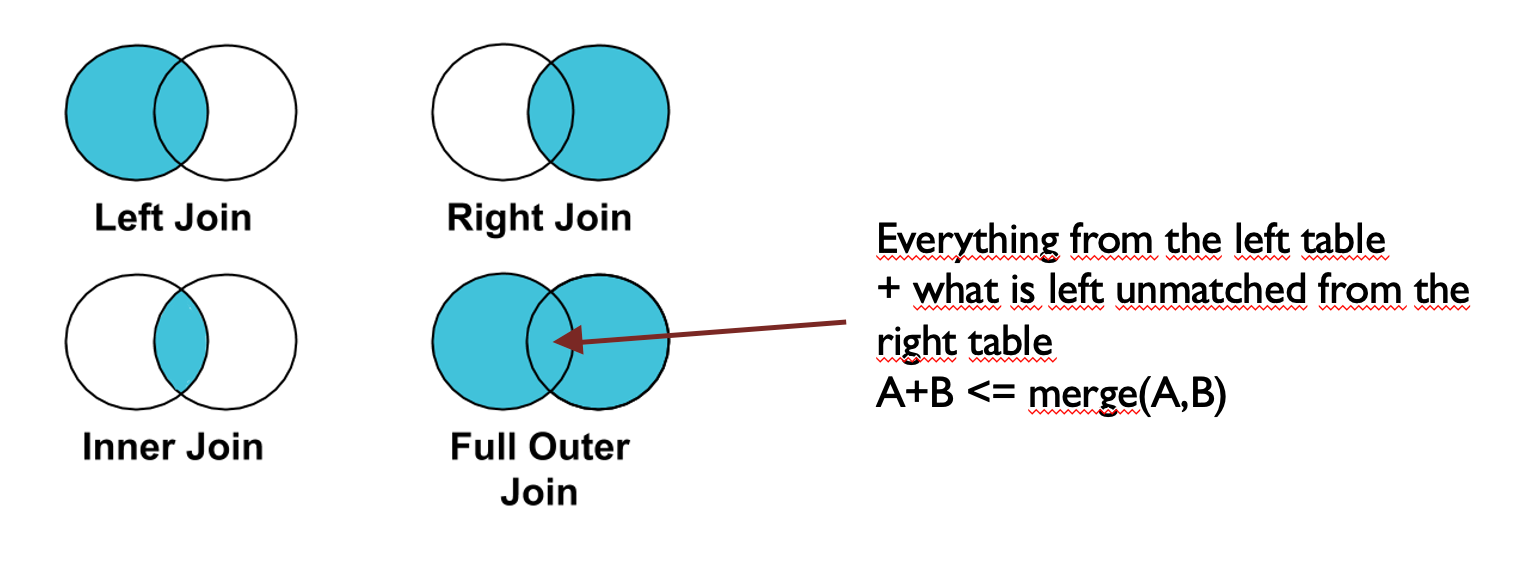

For the purpose of further analysis, we will only keep observations that have counterparts in both datasets (`inner join`). Depending on the task, you might choose between inner, outer or left join.

Let's load more data:

### Read data about BOXOFFICE
Data source: https://www.kaggle.com/c/tmdb-box-office-prediction/data

In [31]:
boxoffice = pd.read_csv("boxoffice.csv")
boxoffice.head(5)

,boxoffice_rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678815482,2018
4,5,Titanic,Par.,659363944,1997


## Join MOVIES_RATINGS with BOXOFFICE

This time, we can't rely on an index (`boxoffice` comes from another source and has no movie ID matching with IMDb data frames), but we can explicitly specify which column (or columns) must match between the two tables - the `on` argument is used for this:

In [32]:
movies_ratings_boxoffice = pd.merge(movies_ratings, boxoffice, on= "title")
movies_ratings_boxoffice.sample(3)

,tconst,title,original_title,is_adult,year_x,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross,year_y
11765,tt0226430,Shadow Hours,Shadow Hours,False,2000,95,"Drama,Thriller",5.9,787,12763,CanW,38181,2000
6654,tt3797868,The Choice,The Choice,False,2016,111,"Drama,Romance",6.6,29485,3566,LGF,18730891,2016
12217,tt0263757,Uptown Girls,Uptown Girls,False,2003,92,"Comedy,Drama,Romance",6.1,32865,2240,MGM,37182494,2003


Notice that we have two ugly looking columns - `year_x`and `year_y`, let's use suffix argument and make them look more readable

In [33]:
movies_ratings_boxoffice = pd.merge(
    movies_ratings,
    boxoffice,
    suffixes=["_imdb", "_boxoffice"],
    on="title"
)
movies_ratings_boxoffice.query("title == 'Pinocchio'")

,tconst,title,original_title,is_adult,year_imdb,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross,year_boxoffice
1643,tt0032910,Pinocchio,Pinocchio,False,1940,88,"Animation,Comedy,Family",7.5,114689,885,Dis.,84254167,1940
1644,tt0032910,Pinocchio,Pinocchio,False,1940,88,"Animation,Comedy,Family",7.5,114689,6108,Mira.,3684305,2002
1645,tt0062400,Pinocchio,Turlis Abenteuer,False,1967,75,"Adventure,Family,Fantasy",7.2,19,885,Dis.,84254167,1940
1646,tt0062400,Pinocchio,Turlis Abenteuer,False,1967,75,"Adventure,Family,Fantasy",7.2,19,6108,Mira.,3684305,2002
1647,tt0067061,Pinocchio,Pinocchio,False,1971,79,"Comedy,Fantasy",3.5,123,885,Dis.,84254167,1940
1648,tt0067061,Pinocchio,Pinocchio,False,1971,79,"Comedy,Fantasy",3.5,123,6108,Mira.,3684305,2002
1649,tt0194248,Pinocchio,Pinocchio,False,1911,50,Fantasy,5.9,69,885,Dis.,84254167,1940
1650,tt0194248,Pinocchio,Pinocchio,False,1911,50,Fantasy,5.9,69,6108,Mira.,3684305,2002
1651,tt0255477,Pinocchio,Pinocchio,False,2002,108,"Comedy,Family,Fantasy",4.3,7192,885,Dis.,84254167,1940
1652,tt0255477,Pinocchio,Pinocchio,False,2002,108,"Comedy,Family,Fantasy",4.3,7192,6108,Mira.,3684305,2002


In [34]:
movies_ratings.query("title == 'Pinocchio'")

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes
10844,tt0032910,Pinocchio,Pinocchio,False,1940,88,"Animation,Comedy,Family",7.5,114689
30839,tt0062400,Pinocchio,Turlis Abenteuer,False,1967,75,"Adventure,Family,Fantasy",7.2,19
33903,tt0067061,Pinocchio,Pinocchio,False,1971,79,"Comedy,Fantasy",3.5,123
83338,tt0194248,Pinocchio,Pinocchio,False,1911,50,Fantasy,5.9,69
96192,tt0255477,Pinocchio,Pinocchio,False,2002,108,"Comedy,Family,Fantasy",4.3,7192
103313,tt0287351,Pinocchio,Un burattino di nome Pinocchio,False,1971,96,"Animation,Family,Fantasy",7.0,117
161198,tt1693039,Pinocchio,Pinocchio,False,2012,75,"Animation,Family,Fantasy",6.3,218
202190,tt4242112,Pinocchio,Pinocchio,False,2015,<NA>,"Family,Fantasy",4.9,43
211162,tt5263832,Pinocchio,Pinocchio,False,2015,75,Documentary,6.8,8


In [35]:
boxoffice.query("title == 'Pinocchio'")

,boxoffice_rank,title,studio,lifetime_gross,year
884,885,Pinocchio,Dis.,84254167,1940
6107,6108,Pinocchio,Mira.,3684305,2002


Oops, something went definetly wrong here. There are a lot of different Pinocchio movies and each of them has always been joined by both `boxoffice` title. 

The key take-away is that when joining, it's a good idea to think about the **uniqueness** of the values in the column we use as the **key**. The name of the film is obviously not unique.

In our particular case, we noticed the problem ourselves, but if the duplicate key is drowned in millions of values, we would like the computer to know it for us.

The `validate` argument is used for this - depending on what relationship you expect, the allowed values are:

- `one_to_one` eg. Movie database and IMDB Rating database
- `one_to_many` eg. Movie database and Individual User Ratings
- `many_to_many` eg. Student database and Classroom database (each Student can attend many classrooms, Each Classroom can accomodate many Students)

Let's try to find a solution and merge on two columns `title`and `year`(the `on` argument will handle that). Let's also drop all the movies that do not have a year.

In [37]:
movies_ratings = movies_ratings.dropna(subset = ["year"]) # Discard all rows without year

In [38]:
movies_ratings_boxoffice = pd.merge(movies_ratings, boxoffice,
          on=["title", "year"],
          #validate = "many_to_one" # movies_with_rating are still not unique!    
         )

movies_ratings_boxoffice.query("title == 'Playback'")

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross
6926,tt1682940,Playback,Playback,False,2012,98,"Horror,Thriller",4.3,4478,16256,Magn.,264
6927,tt2333262,Playback,Playback,False,2012,113,Drama,4.9,27,16256,Magn.,264
6928,tt2613286,Playback,Dur d'être Dieu,False,2012,66,Documentary,5.2,8,16256,Magn.,264


We still do not have unique values! Notice that we have 3 movies from IMDb database and only one in Rotten Tomatoes table.

**Hypothesis** - IMDb database contains many more movies, including very small releases. Most likely only the movies with many `imdb_votes` are matching the data from boxoffice data frame. Notice 3 "Playback" movies with 4478, 27 and 8 votes. Most likely the boxoffice ranking is referring to the most popular movie.

How are we going to handle that?

Let's sort movies from `movies_ratings` by `imdb_votes`and keep only the first unique occurence of`title`and `year`. When `title` and `year`become unique, we can easily match them with `boxoffice`table.

Let's go step by step:


In [39]:
movies_ratings_sorted = movies_ratings.sort_values("imdb_votes", ascending = False)
movies_ratings_sorted.query("title == 'Playback'")

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes
160888,tt1682940,Playback,Playback,False,2012,98,"Horror,Thriller",4.3,4478
60771,tt0114142,Playback,Playback,False,1996,92,"Drama,Thriller",4.1,294
162360,tt1729217,Playback,Playback,False,1962,62,"Crime,Drama,Thriller",6.9,39
178668,tt2333262,Playback,Playback,False,2012,113,Drama,4.9,27
183733,tt2613286,Playback,Dur d'être Dieu,False,2012,66,Documentary,5.2,8


In [40]:
movies_ratings_popular = movies_ratings_sorted.drop_duplicates(subset =["title","year"], keep = "first")
movies_ratings_popular.query("title == 'Playback'")

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes
160888,tt1682940,Playback,Playback,False,2012,98,"Horror,Thriller",4.3,4478
60771,tt0114142,Playback,Playback,False,1996,92,"Drama,Thriller",4.1,294
162360,tt1729217,Playback,Playback,False,1962,62,"Crime,Drama,Thriller",6.9,39


In [41]:
boxoffice.query("title == 'Playback'")

,boxoffice_rank,title,studio,lifetime_gross,year
16255,16256,Playback,Magn.,264,2012


In [42]:
movies_ratings_boxoffice = pd.merge(movies_ratings_popular,
                                    boxoffice,
                                    on=["title", "year"],
                                    validate="one_to_one")

# This finally works!
movies_ratings_boxoffice.query("title == 'Playback'")

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross
5831,tt1682940,Playback,Playback,False,2012,98,"Horror,Thriller",4.3,4478,16256,Magn.,264


## Join MOVIES_RATINGS_BOXOFFICE with ROTTEN TOMATOES

### Read data from Rotten Tomatoes

Unlike IMDb rating, Rotten Tomatoe rating is calculated as a proportion of positive ratings from film critics. Retrieved from: https://data.world/prasert/rotten-tomatoes-top-movies-by-genre

In [43]:
rotten_tomatoes = pd.read_csv("rotten_tomatoes.csv")
rotten_tomatoes.head(5)

,Title,RatingTomatometer,No. of Reviews
0,Black Panther (2018),97,444
1,Mad Max: Fury Road (2015),97,394
2,Wonder Woman (2017),93,410
3,Metropolis (1927),99,118
4,Coco (2017),97,308


In [45]:
# Ready to merge?
pd.merge(movies_ratings, rotten_tomatoes, left_on="title", right_on="Title")

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes,Title,RatingTomatometer,No. of Reviews


0 lines!

Typical problem when merging data from different sources. We are faced with the task of converting "Black Panther (2018)" strings into two values: the name "Black Panther" and the year "2018".

Fortunately, we can easily make those columns using the string method [`.str.slice`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.slice.html), which cuts out a part of each string (and works on the whole column again - the result will be a new column with a function applied to each of the values). We will believe that the penultimate four characters represent the year and the rest, except for some of the parentheses, form the real name:

In [46]:
rotten_tomatoes_beta = (rotten_tomatoes
    .assign(
        title=rotten_tomatoes["Title"].str.slice(0, -7),             
        year=rotten_tomatoes["Title"].str.slice(-5, -1).astype(int)
    )
    .rename({
        "RatingTomatometer": "tomatoes_rating",
        "No. of Reviews": "tomatoes_votes",
    }, axis="columns")
    .drop(["Title"], axis="columns")
)
rotten_tomatoes_beta.sample(10)

,tomatoes_rating,tomatoes_votes,title,year
412,97,152,Capturing the Friedmans,2003
43,95,92,Star Wars: Episode V - The Empire Strikes Back,1980
697,89,240,You Were Never Really Here,2018
727,95,56,Hamlet,1996
259,99,71,Rivers and Tides: Andy Goldsworthy Working Wit...,2002
168,87,180,Wreck-it Ralph,2012
720,94,63,Howards End,1992
450,98,51,The Devil Came on Horseback,2007
780,96,49,Plagues & Pleasures on the Salton Sea,2004
481,92,392,The Shape of Water,2017


The bracket odyssey doesn&#39;t end, someone proactively stuffed the original title of the movies into the brackets. Let's see for yourself using the [`.str.contains`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) method - (because this method by default it uses regular expressions for searching, which we have not yet learned to use, we must explicitly disable it with the argument `regex = False`):

In [47]:
rotten_tomatoes_beta[rotten_tomatoes_beta["title"].str.contains(")", regex=False)]

,tomatoes_rating,tomatoes_votes,title,year
15,100,58,Seven Samurai (Shichinin no Samurai),1956
51,98,46,"Aguirre, the Wrath of God (Aguirre, der Zorn G...",1972
61,97,71,Ghostbusters (1984 Original),1984
69,98,47,A Fistful of Dollars (Per un Pugno di Dollari),1964
99,96,139,Embrace Of The Serpent (El Abrazo De La Serpie...,2016
...,...,...,...,...
762,97,59,To Be and to Have (Etre et Avoir),2003
836,43,82,Goal! The Dream Begins (Goal!: The Impossible ...,2005
872,71,52,Only Human (Seres queridos),2006
904,83,64,"The Good, the Bad, the Weird (Joheun-nom, Nabb...",2010


We have 66 movies that contain brackets in the title. Therefore, as part of the simplification, we will remove all such parentheses. The [`.str.rsplit`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.rsplit.html) function, which splits the string from the right into several parts according to the delimiter and puts them in the list - we choose the left parenthesis `(`, we limit the number of parts to one or two (`n = 1`)):

In [48]:
split_title = (
    rotten_tomatoes_beta["title"]
.str.rsplit ("(", n = 1))
split_title.loc [[41, 61, 81]] # Some lists contain one element, others two

41            [Marvel's The Avengers]
61    [Ghostbusters , 1984 Original)]
81      [Mad Max 2: The Road Warrior]
Name: title, dtype: object

And how to select the first element from each list now?
💡 The [`apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) method allows you to apply any transformation (defined as a function) to each row in the table or the value in `Series`. 

Usually we do without it and we should (that's why we don't pay so much attention to it) because it's not very computationally efficient. But here it makes it easier for us to understand what is actually being done, ie it selects the first element of a list:

In [49]:
def take_first(a_list): # The function we will use in apply    
    return a_list[0]

rotten_tomatoes_final = (rotten_tomatoes_beta
    .assign(
        title=split_title.apply(take_first)
    )
)
rotten_tomatoes_final

,tomatoes_rating,tomatoes_votes,title,year
0,97,444,Black Panther,2018
1,97,394,Mad Max: Fury Road,2015
2,93,410,Wonder Woman,2017
3,99,118,Metropolis,1927
4,97,308,Coco,2017
...,...,...,...,...
942,15,97,Priest,2011
943,14,103,American Outlaws,2001
944,15,54,September Dawn,2007
945,12,147,Jonah Hex,2010


In [50]:
# Getting rid of duplicates right at the beginning kept us movies with the same name :-)r
rotten_tomatoes_final.query("title == 'The Magnificent Seven'")

,tomatoes_rating,tomatoes_votes,title,year
897,88,42,The Magnificent Seven,1960
917,63,289,The Magnificent Seven,2016


In [51]:
pd.merge(movies_ratings,
    rotten_tomatoes_final,
    on=["title", "year"],
    how="inner"
)

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes,tomatoes_rating,tomatoes_votes
0,tt0004972,The Birth of a Nation,The Birth of a Nation,False,1915,195,"Drama,History,War",6.6,20211,98,40
1,tt0015648,Battleship Potemkin,Bronenosets Potemkin,False,1925,75,"Drama,History",8.0,47784,100,45
2,tt0015864,The Gold Rush,The Gold Rush,False,1925,95,"Adventure,Comedy,Drama",8.2,88610,100,43
3,tt0017136,Metropolis,Metropolis,False,1927,153,"Drama,Sci-Fi",8.3,141333,99,118
4,tt0020629,All Quiet on the Western Front,All Quiet on the Western Front,False,1930,136,"Drama,War",8.1,53138,100,42
...,...,...,...,...,...,...,...,...,...,...,...
652,tt7664504,Three Identical Strangers,Three Identical Strangers,False,2018,96,"Biography,Documentary,Drama",7.7,13720,96,157
653,tt7668870,Searching,Searching,False,2018,102,"Drama,Mystery,Thriller",7.7,89047,92,214
654,tt7681902,Won't You Be My Neighbor?,Won't You Be My Neighbor?,False,2018,94,"Biography,Documentary",8.4,15847,98,216
655,tt7689964,RBG,RBG,False,2018,98,"Biography,Documentary",7.5,7412,95,153


When we combine films and ratings on Rotten Tomatoes, we lose almost three hundred of the 947 films. Unfortunately, the blame is mainly the inconsistency of the name, various specific members, punctuation, subtitles, etc. As a solution, there is a lot and a lot of manual work, or some heuristics, which would fit &quot;very similar&quot; names.
* By the way, the difficulty of manual work is sometimes overestimated among developers: Fixing 288 movie titles can take an hour or two, while writing an algorithm to &quot;solve a problem&quot; can take just as long, if not longer. *

We will finish merging all four tables:

In [52]:
movies_complete = pd.merge(
    movies_ratings_boxoffice,
    rotten_tomatoes_final,
    on=["title", "year"],
    how="inner"
)
movies_complete.sort_values("boxoffice_rank").reset_index(drop=True)

,tconst,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross,tomatoes_rating,tomatoes_votes
0,tt1825683,Black Panther,Black Panther,False,2018,134,"Action,Adventure,Sci-Fi",7.3,489977,3,BV,700059566,97,444
1,tt4154756,Avengers: Infinity War,Avengers: Infinity War,False,2018,149,"Action,Adventure,Sci-Fi",8.5,616050,4,BV,678815482,84,408
2,tt0120338,Titanic,Titanic,False,1997,194,"Drama,Romance",7.8,945889,5,Par.,659363944,89,184
3,tt3606756,Incredibles 2,Incredibles 2,False,2018,118,"Action,Adventure,Animation",7.7,192301,9,BV,608581744,94,332
4,tt0468569,The Dark Knight,The Dark Knight,False,2008,152,"Action,Crime,Drama",9.0,2037678,10,WB,535234033,94,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,tt1653827,Boxing Gym,Boxing Gym,False,2010,91,Documentary,7.1,389,12999,Zipp.,32476,95,42
470,tt1530983,Red Hill,Red Hill,False,2010,95,"Thriller,Western",6.4,7844,13681,Strand,21087,78,65
471,tt0021749,City Lights,City Lights,False,1931,87,"Comedy,Drama,Romance",8.5,144261,13827,UA,19181,98,45
472,tt7476236,Minding the Gap,Minding the Gap,False,2018,93,Documentary,8.1,4119,14471,Magn.,11998,100,63


And we lost another 175 movies.
What&#39;s next? If this were a real task, we would have to deal with it somehow - to examine why which lines do not fit, what the names of the same film differ in different datasets, in other words * manual work, work, work ... *
Fortunately, this is only an exemplary task, and we can be satisfied that we have an incomplete, but still usable data set :-)

## Correlation between two variables - visualise with `seaborn`
Let's look at the relationships between multiple variables in more detail and show some bolder visualizations.

Note: We will continue with the above movie data (and its merged tables), so you need to runall cells preceding this chapter.

We will focus on `seaborn`library and explore its core capabilities

### Seaborn

Seaborn has two main ways of plotting:

- Axes-level plotting
- Figure-level plotting

Please, just be aware that there are two ways of plotting. We will use both **Figure-level** and **Axes-level** plotting. You can achieve same results no matter whether you use Axes or Figure level plotting.

There are 3 main modules in `seaborn`library reflecting three major ways of plotting the data:

Ways of plotting:
- relational
- distributional
- categorical

Corresponding modules:

- `relplot()`- showing **relationships** between variables -  `scatterplot` or `lineplot`
- `dist()`- showing a **distribution** of a variable - `histogram` or `kde plot`
- `catplot()` - showing differences between **categorical** variables - `barlplot`, `boxplot`, `violinplot`

PLUS

- `pairplot()` - allows for visualising multiple Axes to compare relationships between multiple variables


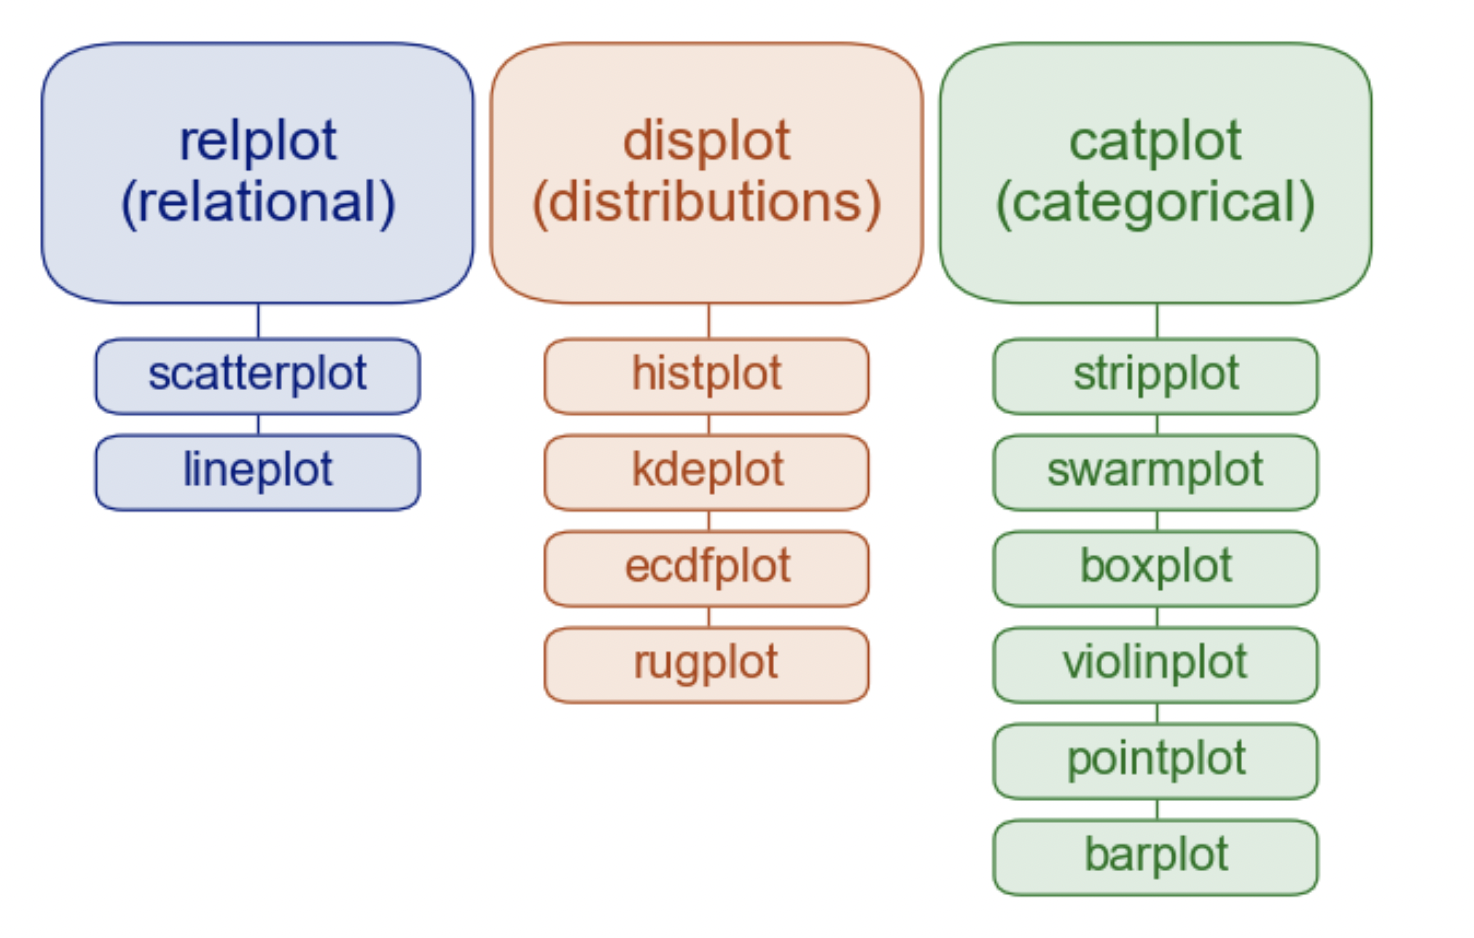
Last time we showed how to quickly get an overview of the properties of individual numerical variables, so let&#39;s repeat it:

In [ ]:
movies_complete.describe () # Table of basic statistical parameters

## Correlation between two variables

Let's examine correlations among all variables in our dataset:

In [53]:
movies_complete.corr(method = "pearson") # We are explicit about the type of coefficient

,is_adult,year,length,imdb_rating,imdb_votes,boxoffice_rank,lifetime_gross,tomatoes_rating,tomatoes_votes
is_adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,1.000000,-0.164026,-0.258788,-0.020599,0.024687,0.105194,-0.143181,0.583895
length,NaN,-0.164026,1.000000,0.264138,0.325280,-0.227022,0.211506,0.001890,0.141379
imdb_rating,NaN,-0.258788,0.264138,1.000000,0.465902,-0.107621,0.202497,0.667327,0.075651
imdb_votes,NaN,-0.020599,0.325280,0.465902,1.000000,-0.529907,0.649080,0.167706,0.434226
boxoffice_rank,NaN,0.024687,-0.227022,-0.107621,-0.529907,1.000000,-0.612221,0.028940,-0.432609
lifetime_gross,NaN,0.105194,0.211506,0.202497,0.649080,-0.612221,1.000000,0.077516,0.499844
tomatoes_rating,NaN,-0.143181,0.001890,0.667327,0.167706,0.028940,0.077516,1.000000,0.059786
tomatoes_votes,NaN,0.583895,0.141379,0.075651,0.434226,-0.432609,0.499844,0.059786,1.000000


Based on the results from the correlation table you can identify potential interesting candidates for further analysis

Let's examine **relationship** between `imdb_rating` and `tomatoes_rating` from `movies_complete` dataset

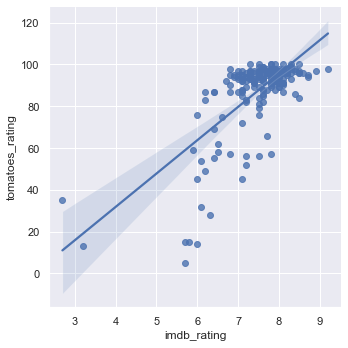

In [54]:
sns.set_theme()
g = sns.lmplot(x="imdb_rating", y="tomatoes_rating", data=movies_complete.sample(200))

There are several methods for calculating the correlation coefficient.

Pandas can do basically three, of which we will only show the default one: **Pearson's correlation**, which is ideal for revealing linear relationships.

The calculation of the correlation coefficient between two `Series` is done in pandas by calling the [`.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) method:

In [55]:
movies_complete["imdb_rating"].corr(movies_complete['tomatoes_rating'])

0.6673272196886042

Recap **Pearson correlation**:
    
- 0.9 to 1 positive or negative indicates a very strong correlation.
- 0.7 to 0.9 positive or negative indicates a strong correlation.
- 0.5 to 0.7 positive or negative indicates a moderate correlation.
- 0.3 to 0.5 positive or negative indicates a weak correlation.
- 0 to 0.3 positive or negative indicates a negligible correlation.

It turns out correlation of around 64% is moderate. How about correlation between the most voted (most popular) movies on IMDb? Could it be that the most popular movies are less likely to be favoured by critics?

In [56]:
top_movies = movies_complete.query("imdb_votes > 400000")

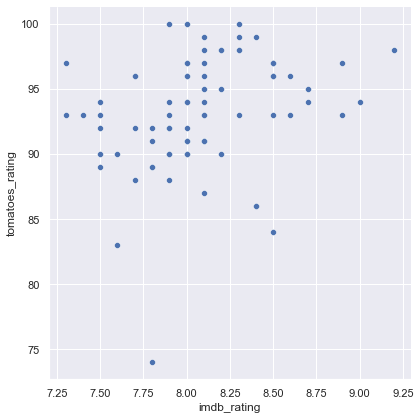

In [57]:
sns.relplot(data=top_movies, x = "imdb_rating", y="tomatoes_rating", kind = 'scatter', height=6, aspect=1)

In [58]:
top_movies["imdb_rating"].corr(top_movies['tomatoes_rating'])

0.2765878613804261

It turns out that the relationship between IMDb rating and tomatoes rating among the most popular movies is very week

> ### TASK

Import new package - scipy (from scipy import stats) and calculate p-value of both above correlations. You need to Google the correct method. Search for keywords like: p-value, pearsonr, scipy.

Can you interpret the results?

In [ ]:
#Your code goes here


### Seaborn - more examples (HOMEWORK - experiment with seaborn)

Let's examine **relationship** between `imdb_votes` and `imdb_rating` from `movies_ratings` dataset (much bigger dataset)

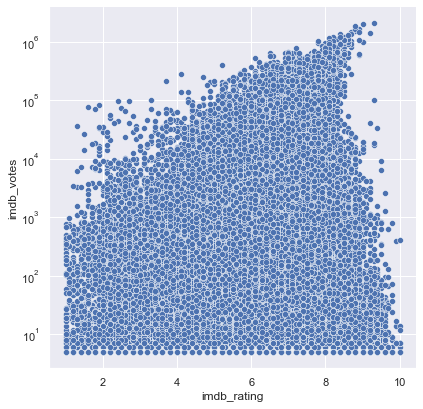

In [59]:
g = sns.relplot(data = movies_ratings, x = "imdb_rating", y ="imdb_votes", kind = 'scatter', height=6, aspect=1)
g.set(yscale="log");

With several hundred films, the individual points are beginning to converge. The same graph for all rated films (~ 200,000) looks completely confusing - We have tons of movies with very little votes and among whole spectrum of imdb_rating

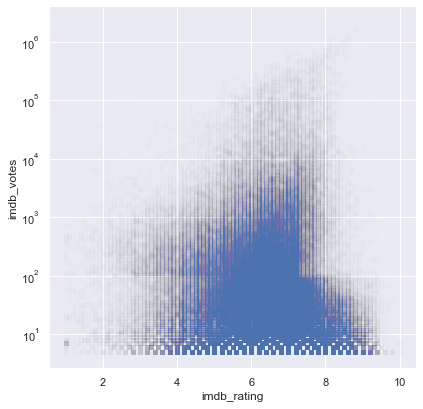

In [60]:
g = sns.relplot(data = movies_ratings, x = "imdb_rating", y ="imdb_votes", kind = 'scatter', height=6, aspect=1, alpha=0.002)
g.set(yscale="log");

### Other comments
A large (positive or negative) correlation coefficient almost always indicates some (especially linear or at least monotonic) relationship between the variables. However, the opposite is not true - a correlation coefficient close to zero can include both cases of complete independence and situations where the relationship between the variables is more complex, as can be seen in the bottom line of the figure above.
To the extreme, it is not a problem at all to draw an almost arbitrary-looking image alias scatter plot that will have given summary statistics (that is, naively viewed &quot;will be the same&quot;). In a nice interactive article [Same Stats, Different Graphs ...] (https://www.autodeskresearch.com/publications/samestats) the authors show nice animations of smooth transitions between completely different looking sets without changing any of the basic statistics, including correlations.

If you want to display the relationships of all pairs of different numeric variables at once, the [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function, which plotted a square grid with diagonal histograms and two-dimensional ones, may be useful. graphs (scatter by default) outside the diagonal: